# Micro-Credit Defaulter Model

In [1]:
from IPython.display import Image
Image(url= "https://cdn.corporatefinanceinstitute.com/assets/microfinance-1024x684.jpeg")

# Table of contents
### 1) Introduction
##### Dataset, features and target value
##### Details about the dataset

### 2) Descriptive analysis and EDA (Exploratory Data Analysis)
##### Count Plot & Pie Plot

### 3) Featuring Engineer and Selection
##### Label Encoder
##### Distribution Plot
##### Box Plot
##### Removing Outliers
##### Z-Score

### 4) Machine Learning
##### Data Preprocessing
##### Scatter Plot
##### Standard Scaler
##### Visualize th Correlation
##### Variance Inflation Factor
##### Train_test_split
##### Handling imbalanced dataset

### 5) Applying Machine Learning Algorithms

### 6) Model Building
##### Logistic Regression
##### - Using KFold Method for best features selection
##### - Using Grid search CV for the best parameter to improve the accuracy score of Logistic Regression
##### - Auc Score of Logistic Regression
### Using SelectKBest Method for best features selection
### RandomForestClassifier
##### - Using Grid search CV for the best parameter to improve the accuracy score of RandomForestClasssifier
##### - Auc Score of RandomForestClasssifier
#### Decison Tree Model
##### - Using Grid search CV for the best parameter to improve the accuracy score of Decison Tree Model
##### - Auc Score of Decison Tree Model
#### XGBoost Model
##### - Using Grid search CV for the best parameter to improve the accuracy score of XGBoost Model
##### - Auc Score of XGBoost Model
#### AdaBoost Classifier
##### - Using Grid search CV for the best parameter to improve the accuracy score of AdaBoost Classifier
##### - Auc Score of XGBoost Model
#### Roc Curve
#### Summary
#### Saving the Best Model
#### Conclusion



# 1.Introduction

### Credit score models have been successfully applied in a traditional credit card industry and by mortgage firms to determine defaulting customer from the non-defaulting customer. In the light of growing competition in the microfinance industry, over-indebtedness and other factors, the industry has come under increased regulatory supervision. Our study provides evidence from a large microfinance institutions (MFI) in India, and we have applied both the credit scoring method and neural network (NN) method and compared the results. In this article, we demonstrate the capability of credit scoring models for an Indian-based microfinance firm in terms of predicting default probability as well the relative importance of each of its associated drivers. A logistic regression model and NN have been used as the predictive analytic tools for sifting the key drivers of default.


#### Microfinance, also called microcredit​, is a type of banking service provided to unemployed or low-income individuals or groups who otherwise would have no other access to financial services.


##### An estimated 2 billion people globally lack access to basic financial services, according to the World Bank. At a basic level, I would define a microfinance institution (MFI) as a financial institution that provides small loans to people who otherwise wouldn’t have access to credit. 
##### The definition of “small loans” depends on the geographic context. India defines microfinance as loans less than 1 lakh which is about  the US SBA defines microloans as loans less than dollars 50,000. 
##### It’s important to remember that there is no globally defined amount. India and the US are the only countries that even have defined limits (as far as I know). In this blog, I’ll be focusing on international microfinance, i.e. outside the US.

### Details about the dataset:

### It consists of 209593 observations and 35 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

#### The aim is to automate the process of predicting if a customer is a defaulter or not and to find the factors affecting the label. The collected data for the variables in the data frames is given below:

##### The aim is to automate the process of predicting if a customer is a defaulter or not and to find the factors affecting the label. The collected data for the variables in the data frames is given below:
##### 1) label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan : {1:success, 0:failure}
##### 2) msisdn : mobile number of user
##### 3) aon : age on cellular network in days
##### 4) daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
##### 5) daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
##### 6) rental30 : Average main account balance over last 30 days
##### 7) rental90 : Average main account balance over last 90 days
##### 8) last_rech_date_ma	: Number of days till last recharge of main account
##### 9) last_rech_date_da	Number of days till last recharge of data account
##### 10) last_rech_amt_ma	: Amount of last recharge of main account (in Indonesian Rupiah)
##### 11) cnt_ma_rech30 : Number of times main account got recharged in last 30 days
##### 12) fr_ma_rech30	: Frequency of main account recharged in last 30 days
##### 13) sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
##### 14) medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
##### 15) medianmarechprebal30	: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
##### 16) cnt_ma_rech90 : Number of times main account got recharged in last 90 days
##### 17) fr_ma_rech90 : Frequency of main account recharged in last 90 days
##### 18) sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
##### 19) medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
##### 20) medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
##### 21) cnt_da_rech30 : Number of times data account got recharged in last 30 days
##### 22) fr_da_rech30 : Frequency of data account recharged in last 30 days
##### 24) fr_da_rech90 : Frequency of data account recharged in last 90 days
##### 26) amnt_loans30 : Total amount of loans taken by user in last 30 days
##### 27) maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
##### 28) medianamnt_loans30 :	Median of amounts of loan taken by the user in last 30 days
##### 29) cnt_loans90 : Number of loans taken by user in last 90 days
##### 30) amnt_loans90 : Total amount of loans taken by user in last 90 days
##### 31) maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
##### 32) medianamnt_loans90 :	Median of amounts of loan taken by the user in last 90 days
##### 33) payback30 :Average payback time in days over last 30 days
##### 34) payback90 : Average payback time in days over last 90 days
##### 35) pcircle : telecom circle
##### 36) pdate : date


### Impoting all Libraries

In [1]:
! pip install xgboost

In [2]:
!pip install imbalanced-learn

In [3]:
# import necessaries libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics
from imblearn.over_sampling import SMOTE

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

#n for models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

#### Above I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.

## Loading csv data

#### Now I am going to upload or read the files/data-sets using pandas. For this I used read_csv method.

In [4]:
# Loading the dataset
df = pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

#### Then I get the top 5 values. I can get using the head function.

### Droppping Unwanted Columns

In [5]:
# dropping unnamed column
df.drop('Unnamed: 0',inplace=True,axis=1)
df.drop('msisdn',inplace=True,axis=1)

In [6]:
df.shape

(209593, 35)

In [7]:
# Lets find out is there any null values in this dataset.
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

#### Well as a first observation I can see that there are no missing values in the above dataset.
#### Acoording to the shape of the dataset it contains 209593 rows & 35 columns.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(209562, 35)

#### From the above code I can analayze there is one duplicates in this dataset.

In [10]:
df.nunique()

label                        2
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

#### By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset

In [11]:
df.describe().T

count          mean           std           min  \
label                 209562.0      0.875297      0.330383      0.000000   
aon                   209562.0   8113.512796  75701.620014    -48.000000   
daily_decr30          209562.0   5382.170031   9221.086606    -93.012667   
daily_decr90          209562.0   6083.386523  10919.382966    -93.012667   
rental30              209562.0   2692.964058   4308.784971 -23737.140000   
rental90              209562.0   3483.905668   5770.737718 -24720.580000   
last_rech_date_ma     209562.0   3756.403389  53909.859829    -29.000000   
last_rech_date_da     209562.0   3712.752058  53378.762010    -29.000000   
last_rech_amt_ma      209562.0   2064.754512   2370.831005      0.000000   
cnt_ma_rech30         209562.0      3.978622      4.256138      0.000000   
fr_ma_rech30          209562.0   3737.907974  53647.573470      0.000000   
sumamnt_ma_rech30     209562.0   7705.599512  10139.952367      0.000000   
medianamnt_ma_rech30  209562.0   1813.078774   2070.904097      0.000000   
medianmarechprebal30  209562.0   3852.497291  54010.348531   -200.000000   
cnt_ma_rech90         209562.0      6.316341      7.193605      0.000000   
fr_ma_rech90          209562.0      7.717916     12.590836      0.000000   
sumamnt_ma_rech90     209562.0  12398.010741  16858.386213      0.000000   
medianamnt_ma_rech90  209562.0   1864.864303   2081.714948      0.000000   
medianmarechprebal90  209562.0     92.038696    369.241324   -200.000000   
cnt_da_rech30         209562.0    262.616952   4184.206206      0.000000   
fr_da_rech30          209562.0   3750.049100  53889.381122      0.000000   
cnt_da_rech90         209562.0      0.041501      0.397585      0.000000   
fr_da_rech90          209562.0      0.045719      0.951456      0.000000   
cnt_loans30           209562.0      2.759226      2.554603      0.000000   
amnt_loans30          209562.0     17.953703     17.380433      0.000000   
maxamnt_loans30       209562.0    274.698489   4245.577376      0.000000   
medianamnt_loans30    209562.0      0.054037      0.218054      0.000000   
cnt_loans90           209562.0     18.523497    224.813949      0.000000   
amnt_loans90          209562.0     23.647923     26.470977      0.000000   
maxamnt_loans90       209562.0      6.703238      2.104003      0.000000   
medianamnt_loans90    209562.0      0.046084      0.200706      0.000000   
payback30             209562.0      3.399125      8.813867      0.000000   
payback90             209562.0      4.321920     10.308399      0.000000   

                             25%          50%         75%            max  
label                    1.00000     1.000000      1.0000       1.000000  
aon                    246.00000   527.000000    982.0000  999860.755168  
daily_decr30            42.48000  1470.465667   7246.0000  265926.000000  
daily_decr90            42.71325  1500.000000   7804.0000  320630.000000  
rental30               280.80000  1083.940000   3357.4525  198926.110000  
rental90               300.37000  1334.400000   4202.5375  200148.110000  
last_rech_date_ma        1.00000     3.000000      7.0000  998650.377733  
last_rech_date_da        0.00000     0.000000      0.0000  999171.809410  
last_rech_amt_ma       770.00000  1539.000000   2309.0000   55000.000000  
cnt_ma_rech30            1.00000     3.000000      5.0000     203.000000  
fr_ma_rech30             0.00000     2.000000      6.0000  999606.368132  
sumamnt_ma_rech30     1540.00000  4628.000000  10011.0000  810096.000000  
medianamnt_ma_rech30   770.00000  1539.000000   1924.0000   55000.000000  
medianmarechprebal30    11.00000    33.955000     83.0000  999479.419319  
cnt_ma_rech90            2.00000     4.000000      8.0000     336.000000  
fr_ma_rech90             0.00000     2.000000      8.0000      88.000000  
sumamnt_ma_rech90     2317.00000  7226.000000  16000.0000  953036.000000  
medianamnt_ma_rech90   773.00000  1539.000000   1924.0000   55000.000000  
medianmarechpre

#### Above statatics data show that there are many outliers in this dataset. There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### Also, number of rows in each column are not same, means there are null values in the data set.
#### Also, the mean and 50% value of most of the column are not same and the STD and mean have a major differnce to each other.¶
#### Most of the columns of min value are near to 0 values.

# 2.EDA - Exploratory Data Analysis

#### Now let me analyse the data using single variable using Count Plot & Pie Plot

### Visualization of categorical data 

#### label

In [12]:
df['label'].value_counts()

1    183429
0     26133
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

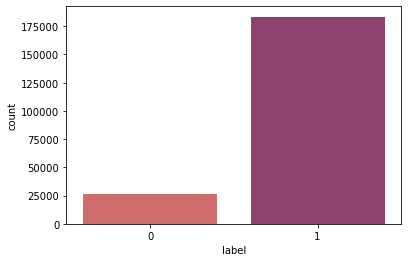

In [13]:
#  count plot of label
sns.countplot(df['label'],palette = 'flare', data = df)

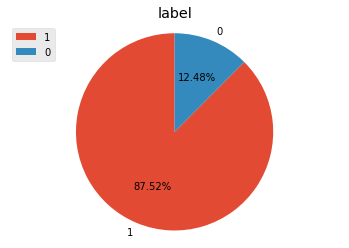

In [14]:
#  pie plot of label 

labels = ['1', '0']
value = [183430, 26162] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'label')
plt.style.use('ggplot')
plt.title('label')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### From the above column  value counts shows of '1' : 183429  & '0' : 26133.
#### According to the count and pie plots it shows that label column is inbalanced with '1' : 87.52% & '0' : 12.48%, which I have to balance soon.        

#### medianamnt_loans30

In [15]:
df['medianamnt_loans30'].value_counts()

0.0    195414
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [16]:
sns.countplot(df['medianamnt_loans30'],palette = 'inferno', data = df)

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='count'>

In [17]:
#  pie plot of medianamnt_loans30 

labels = ['0.0','1.0','0.5','2.0','1.5','3.0']
value = [195444, 7149, 6538, 420, 38, 3] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'medianamnt_loans30')
plt.style.use('ggplot')
plt.title('medianamnt_loans30')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### From the above medianamnt_loans30 column value counts shows of '0.0' : 195414, '1.0' : 7149, '0.5' : 6538, '2.0' : 420, '1.5' : 38 & '3.0' : 3.
#### According to the analysis '0.0' has taken Median of amounts of loan taken by the user in last 30 days with 93.25% ratio.

#### maxamnt_loans90

In [18]:
df['maxamnt_loans90'].value_counts()

6     180914
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

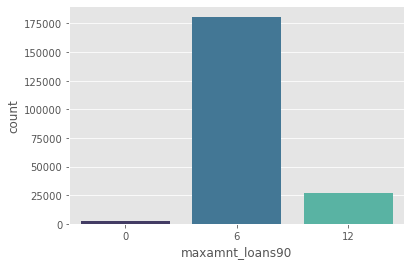

In [19]:
sns.countplot(df['maxamnt_loans90'],palette = 'mako', data = df)

In [20]:
#  pie plot of maxamnt_loans90 

labels = ['6','12','0']
value = [180944, 26605, 2043] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'maxamnt_loans90')
plt.style.use('ggplot')
plt.title('maxamnt_loans90')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### From the above maxamnt_loans90 column value counts shows of '6' : 180914, '12' : 26605, &  '0' : 2043.
#### 6 times loan has been taken widely by the users with 86.33% in last 90 days.

# 3.Feature Engineering and Selection

#### I have explored the trends and relationships within the data, now I can work on engineering a set of features for models. I can also use the results of the EDA to inform this feature engineering. For this particular dataset, I have two main things to do before running a model:

##### Decide what features I should keep.
##### Transform categorical data into numerical.

## Label Encoder

In [12]:
le = LabelEncoder()
df.pcircle = le.fit_transform(df.pcircle)
df.pdate = le.fit_transform(df.pdate)

#### After Applying Label Encoder I have converted all the strings columns into integer.

## Distribution Plot

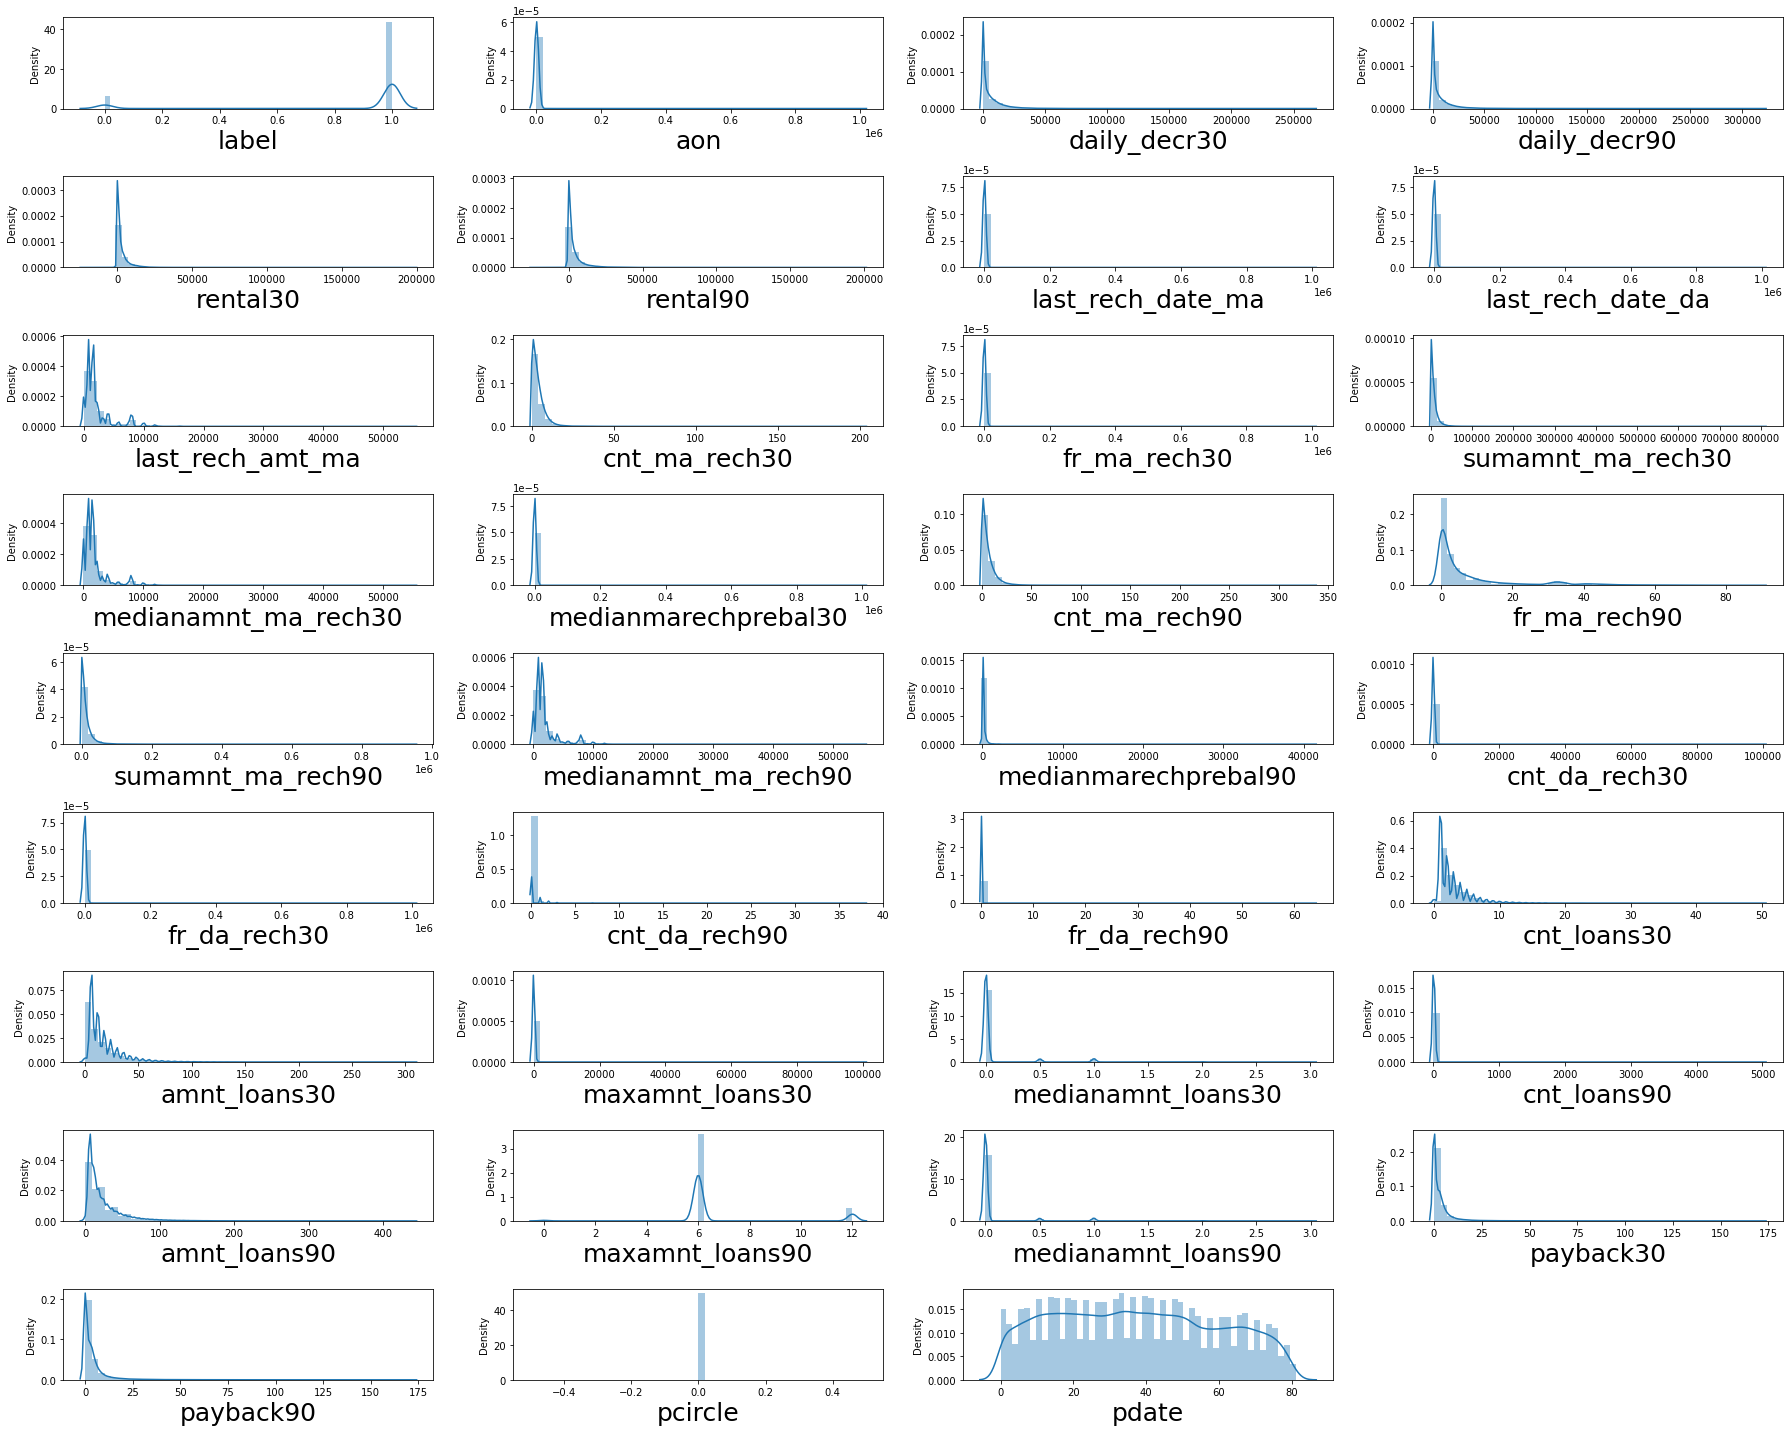

In [14]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### From the above Distribution Plot I can see there are skewness in this dataset which I will clean soon.

## Replacing all the zero values from different columns

In [15]:
# Replacing continous columns with mean
df['aon']=df['aon'].replace(0,df['aon'].mean())
df['daily_decr30']=df['daily_decr30'].replace(0,df['daily_decr30'].mean())
df['daily_decr90']=df['daily_decr90'].replace(0,df['daily_decr90'].mean())
df['rental30']=df['rental30'].replace(0,df['rental30'].mean())
df['rental90']=df['rental90'].replace(0,df['rental90'].mean())
df['last_rech_date_ma']=df['last_rech_date_ma'].replace(0,df['last_rech_date_ma'].mean())
df['last_rech_date_da']=df['last_rech_date_da'].replace(0,df['last_rech_date_da'].mean())
df['last_rech_amt_ma']=df['last_rech_amt_ma'].replace(0,df['last_rech_amt_ma'].mean())
df['cnt_ma_rech30']=df['cnt_ma_rech30'].replace(0,df['cnt_ma_rech30'].mean())
df['fr_ma_rech30']=df['fr_ma_rech30'].replace(0,df['fr_ma_rech30'].mean())
df['sumamnt_ma_rech30']=df['sumamnt_ma_rech30'].replace(0,df['sumamnt_ma_rech30'].mean())
df['medianmarechprebal30']=df['medianmarechprebal30'].replace(0,df['medianmarechprebal30'].mean())
df['medianamnt_ma_rech30']=df['medianamnt_ma_rech30'].replace(0,df['medianamnt_ma_rech30'].mean())
df['cnt_ma_rech90']=df['cnt_ma_rech90'].replace(0,df['cnt_ma_rech90'].mean())
df['fr_ma_rech90']=df['fr_ma_rech90'].replace(0,df['fr_ma_rech90'].mean())
df['sumamnt_ma_rech90']=df['sumamnt_ma_rech90'].replace(0,df['sumamnt_ma_rech90'].mean())
df['medianamnt_ma_rech90']=df['medianamnt_ma_rech90'].replace(0,df['medianamnt_ma_rech90'].mean())
df['medianmarechprebal30']=df['medianmarechprebal30'].replace(0,df['medianmarechprebal30'].mean())
df['cnt_da_rech30']=df['cnt_da_rech30'].replace(0,df['cnt_da_rech30'].mean())
df['fr_da_rech30']=df['fr_da_rech30'].replace(0,df['fr_da_rech30'].mean())
df['cnt_da_rech90']=df['cnt_da_rech90'].replace(0,df['cnt_da_rech90'].mean())
df['fr_da_rech90']=df['fr_da_rech90'].replace(0,df['fr_da_rech90'].mean())
df['cnt_loans30']=df['cnt_loans30'].replace(0,df['cnt_loans30'].mean())
df['amnt_loans30']=df['amnt_loans30'].replace(0,df['amnt_loans30'].mean())
df['maxamnt_loans30']=df['maxamnt_loans30'].replace(0,df['maxamnt_loans30'].mean())
df['medianamnt_loans30']=df['medianamnt_loans30'].replace(0,df['medianamnt_loans30'].mean())
df['cnt_loans90']=df['cnt_loans90'].replace(0,df['cnt_loans90'].mean())
df['amnt_loans90']=df['amnt_loans90'].replace(0,df['amnt_loans90'].mean())
df['payback30']=df['payback30'].replace(0,df['payback30'].mean())
df['payback90']=df['payback90'].replace(0,df['payback90'].mean())
df['pdate']=df['pdate'].replace(0,df['pdate'].mean())

# replacing categorical columns with mode
df['maxamnt_loans90']=df['maxamnt_loans90'].replace(0,df['maxamnt_loans90'].mode()[0])
df['medianamnt_loans90']=df['medianamnt_loans90'].replace(0,df['medianamnt_loans90'].mode()[0])
df['pcircle']=df['pcircle'].replace(0,df['pcircle'].mode()[0])

#### According to the Dataset the above columns have zero values and also of continious & categorical type which i have replace it with mean & mode.

In [16]:
df.describe().T

count          mean           std           min  \
label                 209562.0      0.875297      0.330383      0.000000   
aon                   209562.0   8113.512796  75701.620014    -48.000000   
daily_decr30          209562.0   5487.983778   9189.544673    -93.012667   
daily_decr90          209562.0   6200.634871  10886.041829    -93.012667   
rental30              209562.0   2789.817830   4277.314842 -23737.140000   
rental90              209562.0   3598.433235   5734.918661 -24720.580000   
last_rech_date_ma     209562.0   4127.684362  53895.644062    -29.000000   
last_rech_date_da     209562.0   7306.235132  53132.262103    -29.000000   
last_rech_amt_ma      209562.0   2271.316667   2269.728915    173.000000   
cnt_ma_rech30         209562.0      4.509246      3.965096      1.000000   
fr_ma_rech30          209562.0   5140.822986  53580.313242      1.000000   
sumamnt_ma_rech30     209562.0   8733.284879   9687.286622    173.000000   
medianamnt_ma_rech30  209562.0   2054.886633   1947.242581    173.000000   
medianmarechprebal30  209562.0   4415.953652  53987.309058   -200.000000   
cnt_ma_rech90         209562.0      6.946884      6.882414      1.000000   
fr_ma_rech90          209562.0     10.138415     11.575362      1.000000   
sumamnt_ma_rech90     209562.0  13635.670168  16350.192337    173.000000   
medianamnt_ma_rech90  209562.0   2051.028594   1987.890092    173.000000   
medianmarechprebal90  209562.0     92.038696    369.241324   -200.000000   
cnt_da_rech30         209562.0    520.078360   4168.174760      1.000000   
fr_da_rech30          209562.0   7471.842469  53630.743154      1.000000   
cnt_da_rech90         209562.0      0.081939      0.393396      0.041501   
fr_da_rech90          209562.0      0.091250      0.949270      0.045719   
cnt_loans30           209562.0      2.802136      2.530959      1.000000   
amnt_loans30          209562.0     18.232910     17.233360      6.000000   
maxamnt_loans30       209562.0    278.950796   4245.437676      6.000000   
medianamnt_loans30    209562.0      0.104425      0.205635      0.054037   
cnt_loans90           209562.0     18.703462    224.806463      1.000000   
amnt_loans90          209562.0     23.878464     26.366790      6.000000   
maxamnt_loans90       209562.0      6.761732      1.997542      6.000000   
medianamnt_loans90    209562.0      0.046084      0.200706      0.000000   
payback30             209562.0      5.129522      8.295065      1.000000   
payback90             209562.0      6.294959      9.687251      1.000000   
pcircle               209562.0      0.000000      0.000000      0.000000   
pdate                 209562.0     37.969596     21.593420      1.000000   

                              25%           50%           75%            max  
label                    1.000000      1.000000      1.000000       1.000000  
aon                    246.000000    527.000000    982.000000  999860.755168  
daily_decr30            49.944750   1742.419167   7246.000000  265926.000000  
daily_decr90            50.021500   1780.000000   7804.000000  320630.000000  
rental30               352.467500   1270.135000   3357.452500  198926.110000  
rental90               391.500000   1557.600000   4202.537500  200148.110000  
last_rech_date_ma        2.000000      4.000000     11.000000  998650.377733  
last_rech_date_da     3712.752058   3712.752058   3712.752058  999171.809410  
last_rech_amt_ma       773.000000   1539.000000   2309.000000   55000.000000  
cnt_ma_rech30            2.000000      3.978622      5.000000     203.000000  
fr_ma_rech30             3.000000     10.000000   3737.907974  999606.368132  
sumamnt_ma_rech30     3086.000000   7226.000000  10011.000000  810096.000000  
medianamnt_ma_rech30   773.000000   1539.000000   1924.000000   55000.000000  
medianmarechprebal30    23.200000     58.200000    229.000000  999479.419319  
cnt_ma_rech90            3.000000      6.000000      8.000000     336.000000  
fr_ma_rech90            

# Box Plot

In [17]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(20,20))

label                      AxesSubplot(0.125,0.816017;0.168478x0.0639831)
aon                     AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
daily_decr30            AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
daily_decr90            AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
rental30                   AxesSubplot(0.125,0.739237;0.168478x0.0639831)
rental90                AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
last_rech_date_ma       AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
last_rech_date_da       AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
last_rech_amt_ma           AxesSubplot(0.125,0.662458;0.168478x0.0639831)
cnt_ma_rech30           AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
fr_ma_rech30            AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
sumamnt_ma_rech30       AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
medianamnt_ma_rech30       AxesSubplot(0.125,0.585678;0.168478x0.0639831)
medianmarechprebal30    AxesSubplot(0.

#### From above image I can clear see that there are many black dots in major columns which are referring to huge outliers.
#### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that can find the zscore values.

### Removing outliers

#### An outlier is a data point in a data set that is distant from all other observations. 
#### A data point that lies outside the overall distribution of the data set.

## Z score

In [18]:
z_score = zscore(df[['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','amnt_loans30','payback30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','amnt_loans90','payback90']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(159006, 35)

#### I am using zscore to remove it by replacing the outliers with the continious columns.
#### And from shape I got 159006 rows which shows major of the outliers are cleaned.

### Distribution plot after removing the outliers & skewness

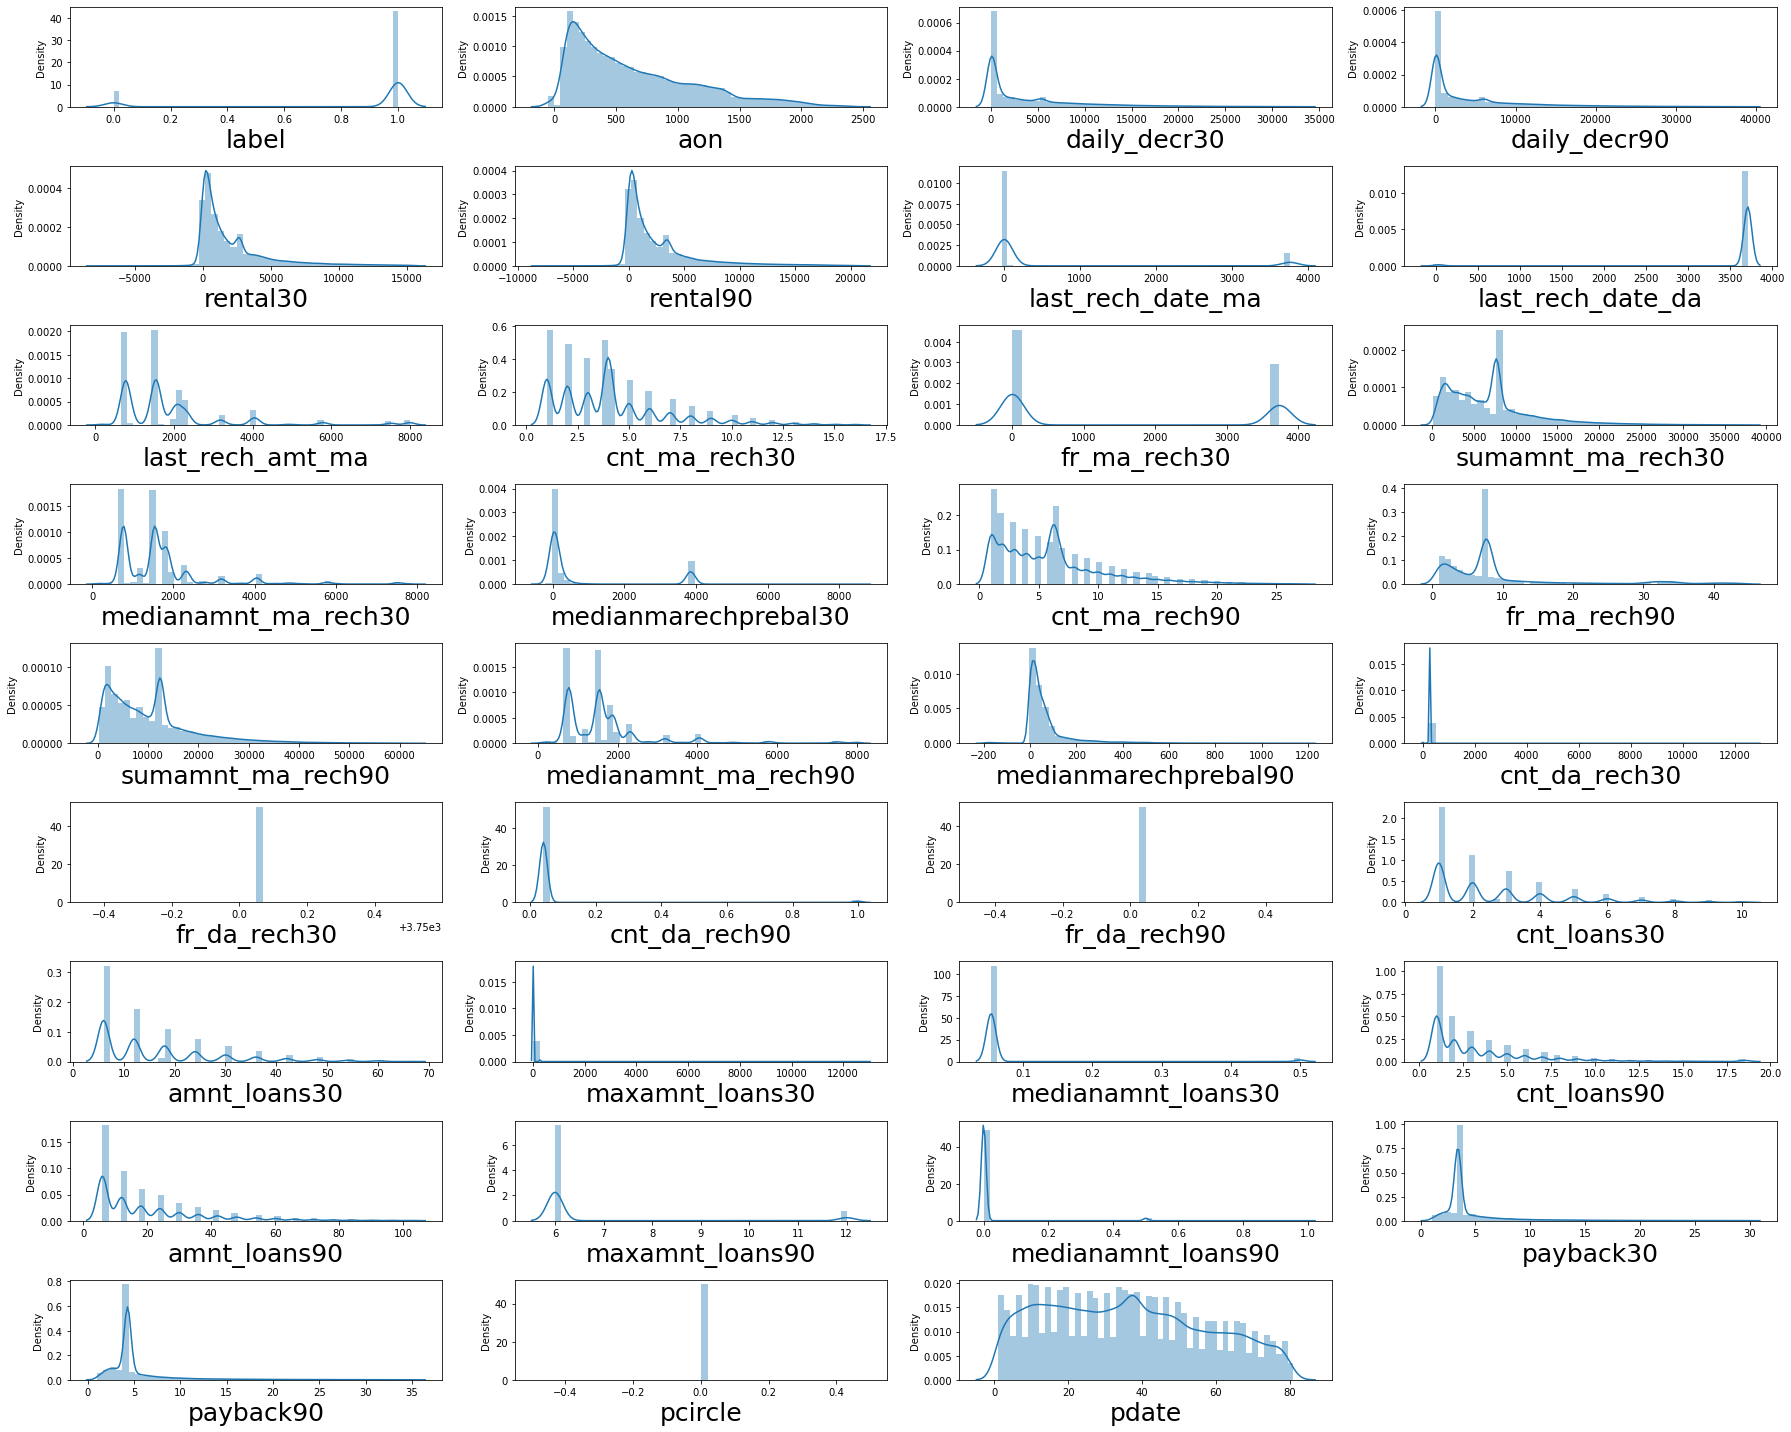

In [19]:
# using the Distribution plot after removing the outliers & skewness

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### Again I Visualize Distribution plot after removing the outliers & skewness which shows many ouliers are cleaned. 

# 4.Machine Learning

##  Data Preprocessing

In [20]:
# Divinding dataset into features and label
y=df['label']
x=df.drop(columns=['label'])

##### Splitting the dataset into the Training set and Test set

### Scatter Plot

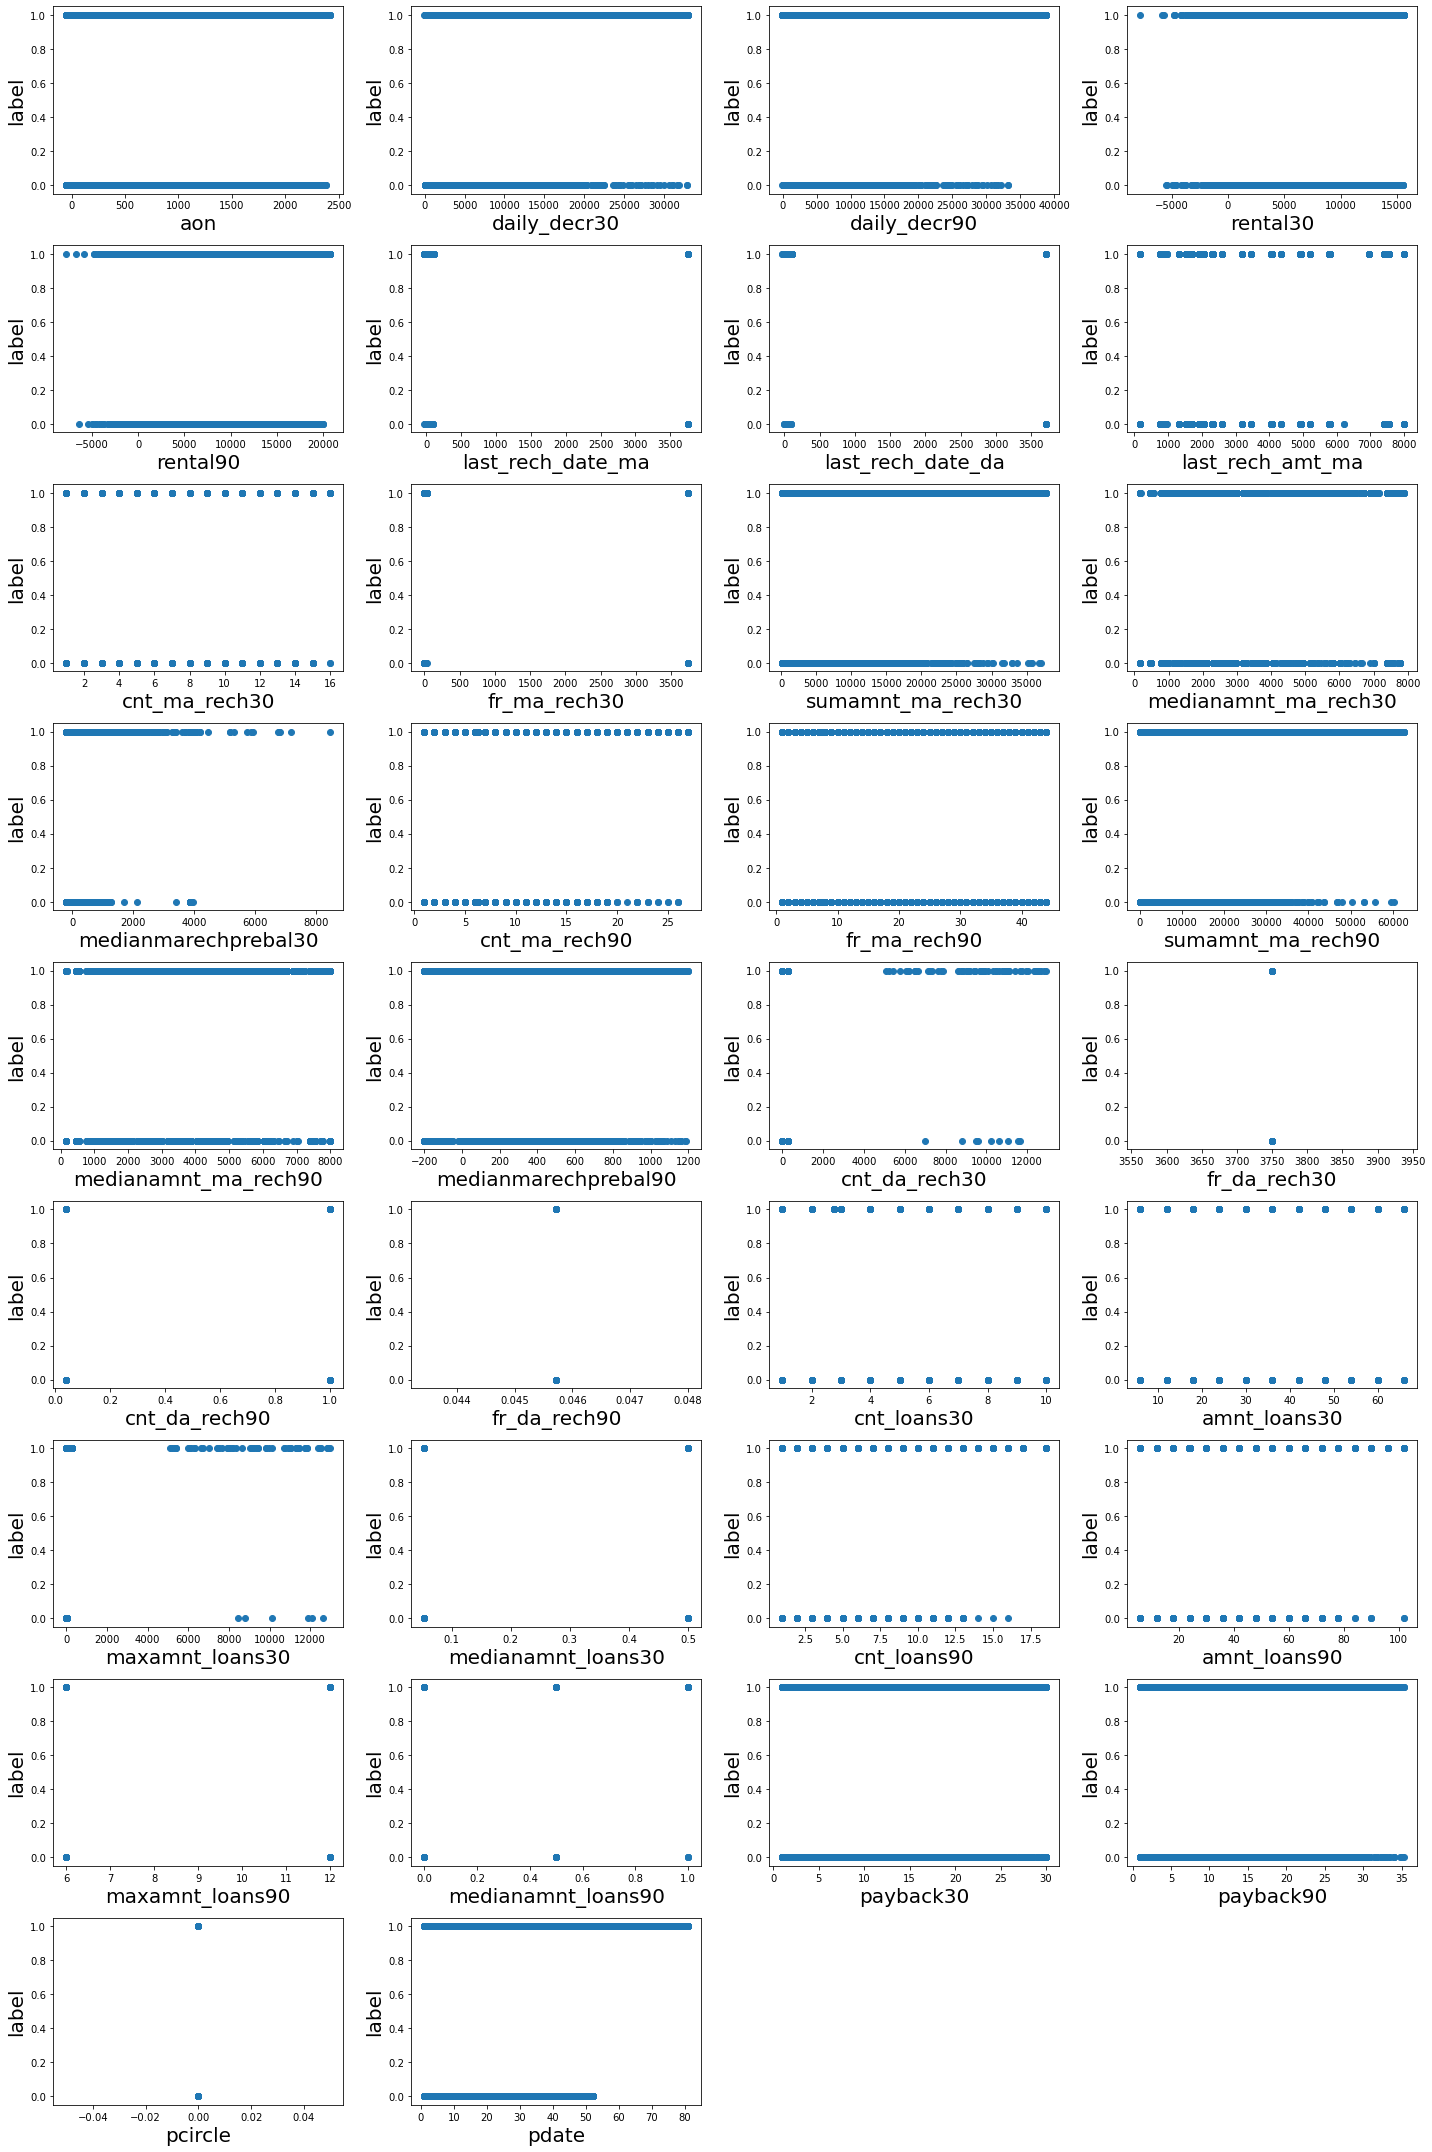

In [21]:
# visualizing the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=36:
        ax = plt.subplot(9,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('label',fontsize=20)
        plotnumber +=1 
        plt.tight_layout()

#### Here I use scatter plot to give a glimpse of relationship betwwwen Target & Faetures:
####  Scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

#### From my analysis Scatter plot gives the relationship between Features & Target variable.
#### payback - 90 (Average payback time in days over last 90 days) columns shows a wde relationship with label column.

## Standard Scaler

#### Feature Scaling

In [22]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.74614976, -0.14190104, -0.18650732, ...,  5.89201387,
         0.        ,  0.6153493 ],
       [ 0.14244961,  1.49683436,  1.24719255, ..., -0.24350266,
         0.        ,  1.59700741],
       [-0.21500968, -0.44139167, -0.45033715, ..., -0.24350266,
         0.        ,  2.01771802],
       ...,
       [ 0.75033237,  1.44642886,  1.2123138 , ..., -0.36497624,
         0.        ,  1.03605992],
       [ 2.20238452,  1.56302546,  1.31834581, ...,  1.29250458,
         0.        ,  0.84907742],
       [ 1.89743337,  0.11733253,  0.04607091, ..., -0.24350266,
         0.        ,  0.00765619]])

#### The scikit library provides various types of scalers above I will used the StandardScaler to scale the data.

## Visualize the correlation

In [23]:
# find correlation of features vs target using corrwith
df.drop('label',axis=1).corrwith(df.label).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### Using corrwith to find the correlation relationship of features vs label which shows medianmarechprebal30 : (Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)), fr_ma_rech30 and last_rech_date_ma column Having more Negative values and remaining columns are having a relation with other columns.

## VIF - variance inflation factor

In [24]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif              Features
0    1.021155                   aon
1   28.951677          daily_decr30
2   31.955852          daily_decr90
3   11.744884              rental30
4   12.939801              rental90
5    3.867719     last_rech_date_ma
6   14.042832     last_rech_date_da
7    2.441218      last_rech_amt_ma
8   12.331707         cnt_ma_rech30
9    1.759909          fr_ma_rech30
10  10.936786     sumamnt_ma_rech30
11   4.708453  medianamnt_ma_rech30
12   3.849951  medianmarechprebal30
13  13.735866         cnt_ma_rech90
14   1.150818          fr_ma_rech90
15  12.116186     sumamnt_ma_rech90
16   4.456217  medianamnt_ma_rech90
17   1.116322  medianmarechprebal90
18   1.008771         cnt_da_rech30
19   0.000000          fr_da_rech30
20  14.045246         cnt_da_rech90
21   0.000000          fr_da_rech90
22  62.277542           cnt_loans30
23  68.385523          amnt_loans30
24   1.017794       maxamnt_loans30
25   2.675012    medianamnt_loans30
26   5.379877           cnt_loans90
27  12.866789          amnt_loans90
28   3.861598       maxamnt_loans90
29   2.671846    medianamnt_loans90
30   2.562709             payback30
31   2.606638             payback90
32        NaN               pcircle
33   2.051674                 pdate

#### By using Variance Inflation Factor(VIF) I can see that there is a strong relationship among many Features as values are greater than 5 which shows there is multi-collinearity exists.

## Train_test_split

#### The data should be divided into train and test data. 
#### I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data. 
#### I can set the random state of the split to ensure consistent results.

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

## Handling imbalanced dataset

#### I have a imbalanced dataset with Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.
##### Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.
#### From above Count & Pie plot it shows 87.52% has payed the loan while 12.58% are defaulters which I am using SMOTE function to balance the dataset. 

## Upsampling

In [26]:
# using SMOTE Function for upsamling

sm = SMOTE(random_state=42)

x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (159006, 34)
Shape of X after SMOTE: (273628, 34)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: label, dtype: float64

#### After using SMOTE Method it shows from the above coding that the target column is balanced.

# 5. Applying Machine Learning Algorithms

#### Since I must predict a binary class, I will be using classification models for training & predicting label. 
#### I need to keep in mind that my focus should be to have a better accuracy of predicting label i.e. 'Label 1' =  loan has been payed  which in confusion matrix will be "True Positive". 
#### However, I should not forget the prediction accuracy of not qualifying for attrition i.e. 'Label 0' = defaulters "True Negative" in confusion matrix.

#### In this section; Logistic Regression, Decision Tree Classification, Random Forest Classification, XGBoost Classification & ADA Boost Classification algorithms are applied to the dataset.

#### I will also try to improve model accuracy via hyperparameter tuning. 
#### I have coded four functions to apply to the models throughout this section.

# 6. Model Building

### Logistic Regression

#### As here I wan’t to classify between the customers who have stayed in the company & how many have churned out, so I have used Logistic Regression.
#### Here is the code for Logistic Regression

In [47]:
# Train Data
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred = log_reg.predict(x_test)

#### Confusion Matrix of Test Data

In [49]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 1196,  4325],
       [  483, 33748]], dtype=int64)

In [50]:
# Test Data
log_reg.score(x_test,y_test)

0.8790501106862548

In [51]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.22      0.33      5521
           1       0.89      0.99      0.93     34231

    accuracy                           0.88     39752
   macro avg       0.80      0.60      0.63     39752
weighted avg       0.86      0.88      0.85     39752



In [53]:
# finding  confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Logistic Regression')

## The Logistic Regression accuracy score is 87.90%

### Using KFold Method for best features selection

In [147]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [148]:
# set kfold number for k fold cross validation method
kfold = model_selection.KFold(n_splits=10)

#### Let use Grid search CV for the best parameter to improve the accuracy score of Logistic Regression

In [149]:
# hyperparameter tuning for logistic regression
param_grid = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [150]:
# apply grid search on each hyperparameter and fit in with data
gridsearch = GridSearchCV(log_reg, param_grid, cv= kfold)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [151]:
lr_res = gridsearch.best_params_

In [152]:
# apply helper function to get the best hyperparameter
get_grid_res(gridsearch)

Best Score: 0.878
Best Parameters:
C : 0.05
penalty : l2


In [153]:
best_lr_model = gridsearch.best_estimator_

#### By using Grid Search CV there is no improve in the Accuracy Score : 87.8%

#### After modelling KNN then my next step is to find Auc Score which will help me to make Roc_Auc Curve.

#### Below is the Auc Score:

In [154]:
# Logistic Regression
roc_auc_score(y_test,log_reg.predict(x_test))

0.6012587026662682

#### After using Logistic Regression I use SelectKBest Method Model for best features selection.
#### Therefore my first work is to use best feature method selection method.

### Using SelectKBest Method for best features selection

In [155]:
best_features = SelectKBest(score_func=f_classif,k=30)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate DataFrame
feature_scores = pd.concat([df_columns,df_scores],axis = 1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(30,'Score'))

           Features_Name         Score
12  medianmarechprebal30  19484.248998
5      last_rech_date_ma  19409.480765
9           fr_ma_rech30  17498.355595
23          amnt_loans30  10835.682208
27          amnt_loans90  10651.814441
22           cnt_loans30  10395.061976
26           cnt_loans90   9558.722360
13         cnt_ma_rech90   5025.746517
8          cnt_ma_rech30   4015.955577
33                 pdate   3828.945820
2           daily_decr90   3381.392489
1           daily_decr30   3348.111089
15     sumamnt_ma_rech90   3218.710669
17  medianmarechprebal90   2450.722035
10     sumamnt_ma_rech30   2338.112832
28       maxamnt_loans90   1187.441922
0                    aon   1114.089547
25    medianamnt_loans30    243.051631
30             payback30    207.787671
29    medianamnt_loans90    142.005124
6      last_rech_date_da    131.063193
4               rental90    117.802529
20         cnt_da_rech90    102.288920
7       last_rech_amt_ma     77.912229
14          fr_ma_rech90 

#### medianmarechprebal30 Plays a important role in Micro-Credit Defaulter Model
  
#### Therefore, from my analysis medianmarechprebal30 is the column to predict label of the credit defaulters.

## RandomForestClassifier

#### After using KNN I use RandomForestClassifier to predict the label.

In [36]:
# Random Forest
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

#### Confusion Matrix of Test Data

In [37]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 3061,  2460],
       [  845, 33386]], dtype=int64)

In [38]:
# Test Data
rfc.score(x_test,y_test)

0.9168595290802979

In [39]:
# Finding classification report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.55      0.65      5521
           1       0.93      0.98      0.95     34231

    accuracy                           0.92     39752
   macro avg       0.86      0.76      0.80     39752
weighted avg       0.91      0.92      0.91     39752



### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 92%.
#### But this score can improve the accuracy by using Grid Search CV

### Let use Grid search CV for the best parameter to improve the accuracy of RandomForestClassifier.

In [40]:
# hyperparameter tuning for RandomForestClassifier
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }
# apply grid search on each hyperparameter and fit in with data
grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [41]:
rfc = grd.best_estimator_

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=15)

In [43]:
y_pred = rfc.predict(x_test)

In [44]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 2346,  3175],
       [  478, 33753]], dtype=int64)

In [45]:
rfc.score(x_test,y_test)

0.9081052525659087

In [46]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56      5521
           1       0.91      0.99      0.95     34231

    accuracy                           0.91     39752
   macro avg       0.87      0.71      0.76     39752
weighted avg       0.90      0.91      0.89     39752



In [47]:
# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RandomForestClassifier')

Text(0.5, 1.0, 'RandomForestClassifier')

### By using Grid Search CV there is no improve in the Accuracy Score : 91%
#### After modelling RandomForestClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.¶
#### Below is the Auc Score:

In [48]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7054795351934936

#### So, I get Auc Score From RandomForestClassifier is 70.56%

## Decision Tree Classifier

### After using Random Forest Classifier I use Decision Tree Classifier to predict the label.

In [27]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

#### Confusion Matrix of Test Data

In [28]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 3231,  2290],
       [ 2545, 31686]], dtype=int64)

In [29]:
dtc.score(x_test,y_test)

0.8783708995773798

In [30]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57      5521
           1       0.93      0.93      0.93     34231

    accuracy                           0.88     39752
   macro avg       0.75      0.76      0.75     39752
weighted avg       0.88      0.88      0.88     39752



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 88%.
#### But this score can improve the accuracy by using Grid Search CV.

### Let use Grid search CV for the best parameter to improve the accuracy

In [31]:
# hyperparameter tuning for Decision Tree Classifier
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [32]:
# apply grid search on each hyperparameter and fit in with data
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [34]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 8}


In [35]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=9,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=9)

In [36]:
y_pred = dtc.predict(x_test)

In [37]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[    0,  5521],
       [    0, 34231]], dtype=int64)

In [38]:
dtc.score(x_test,y_test)

0.861113906218555

In [39]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5521
           1       0.86      1.00      0.93     34231

    accuracy                           0.86     39752
   macro avg       0.43      0.50      0.46     39752
weighted avg       0.74      0.86      0.80     39752



In [40]:
# finding confusion matrix of hyperparameter DecisionTreeClassifier
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')

Text(0.5, 1.0, 'DecisionTreeClassifier')

### By using Grid Search CV there is no in improve the Accuracy Score : 86%
#### After modelling Decision Tree Classifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [41]:
# Decision Tree Classifier
roc_auc_score(y_test,dtc.predict(x_test))

0.5

#### So, I get Auc Score From Decision Tree Classifier is 0.5%

# XGBoost Model

### After using Decision Tree Classifier I use XGBoost Classifier Model to predict the label.

In [35]:
# XGBoost Model
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[16:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.932052593623694

In [37]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.919173878043872

In [38]:
x_test

array([[-0.7986579 ,  1.87746697,  2.13095561, ..., -0.71028475,
         0.        ,  1.64375303],
       [-0.35031913,  1.36652282,  1.27866096, ..., -0.64319624,
         0.        ,  1.31653366],
       [ 1.14414345,  1.35043721,  1.55249706, ..., -0.24350266,
         0.        ,  1.59700741],
       ...,
       [-0.09585658,  1.60184269,  1.915668  , ..., -0.74974858,
         0.        ,  1.26978804],
       [-1.02080774,  4.85692017,  4.21463444, ..., -0.82078347,
         0.        ,  1.08280554],
       [-1.07735498, -0.68691156, -0.66531231, ..., -0.24350266,
         0.        , -0.83376504]])

In [39]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67      5521
           1       0.94      0.97      0.95     34231

    accuracy                           0.92     39752
   macro avg       0.85      0.79      0.81     39752
weighted avg       0.91      0.92      0.92     39752



#### According to my perception of modelling XGBoost Classifier I got Accuracy Score : 92%.
### But this score can improve the accuracy by using Grid Search CV.
#### Let use Grid search CV for the best parameter to improve the accuracy.

In [57]:
# hyperparameter tuning for XGBoost Model
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [58]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [59]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[22:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.908 total time=   1.3s
[22:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.911 total time=   1.0s
[22:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [60]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [61]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[00:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred = xgb.predict(x_test)

In [63]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 2890,  2631],
       [ 1032, 33199]], dtype=int64)

In [64]:
xgb.score(x_test,y_test)

0.907853692895955

In [65]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      5521
           1       0.93      0.97      0.95     34231

    accuracy                           0.91     39752
   macro avg       0.83      0.75      0.78     39752
weighted avg       0.90      0.91      0.90     39752



Text(0.5, 1.0, 'XGBClassifier')

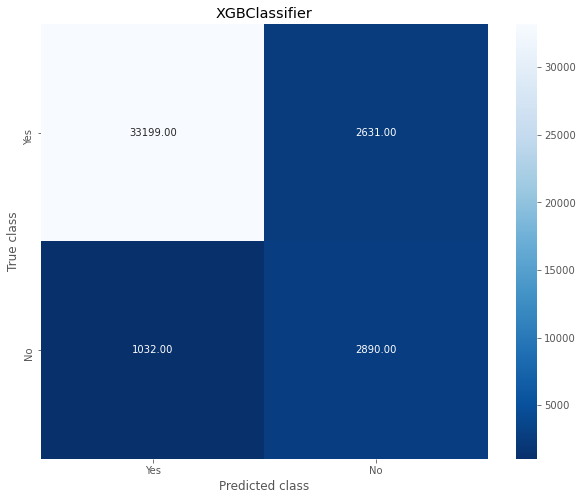

In [66]:
# finding confusion matrix using hyperparameter of XGBClassifier
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBClassifier')

### By using Grid Search CV there is no improve the Accuracy Score : 91%.
#### After modelling XGBClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [90]:
# XGBClassifier 
roc_auc_score(y_test,xgb.predict(x_test))

0.7466538921550134

### So, I get Auc Score From XGBOOST is 74.66%

# AdaBoostClassifier

In [91]:
# AdaBoostClassifier
ada = AdaBoostClassifier()

In [92]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [93]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.9023193801569732


### Hyperparameter tuning for AdaBoost using GridSearchCV

In [94]:
# hyperparameter tuning for AdaBoost Classifier
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [95]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [96]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [97]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.234567, n_estimators=45)

In [98]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [99]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [100]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 2123,  3398],
       [  545, 33686]], dtype=int64)

In [101]:
ada.score(x_test,y_test)

0.9008100221372509

In [102]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.38      0.52      5521
           1       0.91      0.98      0.94     34231

    accuracy                           0.90     39752
   macro avg       0.85      0.68      0.73     39752
weighted avg       0.89      0.90      0.89     39752



In [104]:
# finding confusion matrix using hyperparameter of AdaBoostClassifier
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = "Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('AdaBoostClassifier')

Text(0.5, 1.0, 'AdaBoostClassifier')

### By using Grid Search CV there is no improve in the Accuracy Score : 90.08%.
#### After modelling AdaBoostClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [105]:
# AdaBoostClassifier 
roc_auc_score(y_test,ada.predict(x_test))

0.6843052733696091

#### So, I get Auc Score From Decision Tree Classifier is 68.43%

# Roc Curve

#### In Machine Learning, performance measurement is an essential task.
#### So when it comes to a classification problem, I can count on an AUC - ROC Curve.
#### It is one of the most important evaluation metrics for checking any classification model’s performance.
#### It is also written as AUROC (Area Under the Receiver Operating Characteristics)

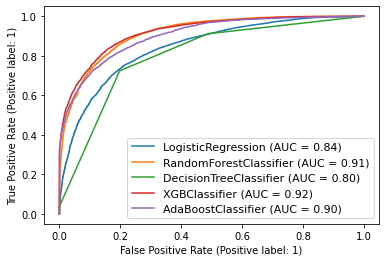

In [106]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# Summary

#### ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
#### ROC curves are appropriate when the observations are balanced or not.
#### According to my Roc_Auc Curve I can say that XGB Classifier Model with 92% is the best predictive model in this Dataset.

# Saving the Best Model

In [40]:
import pickle

In [41]:
# saving the XGBoost classifier Model

filename = 'finalized_model.pickle'
pickle.dump(xgb,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### Saving XGBoost Classifier Model as it accuracy score is 91.91% and Roc_Auc Curve value is 92%

# Conclusion

### In the modeling Building section, I have seen the hyperparameter tuned using XGBoost Classifier has the highest Best Score 91.91%.
### It can be clearly seen the feature engineering effects on each individual five models in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.
### I’ll briefly discuss how I approached this problem of predicting label.

##### a) I have Data File datastet from which I had to extract information.
##### b) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
##### c) After from all datasets, I preprocessed the data using replacing all zeros.
##### d) I did exploratory data analysis on main data frame and tried to see all visualizations.
##### e) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot to remove ouliers.
##### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
##### g) After from all these i split the Features & Labels into 2 parts.
##### h) On this data, I have applied our machine learning models such as logistic regression, Random forest,XGBClassifier, ADABoost Classifier and Decision Tree.
##### i) After which I found Random Forest Classifier Model has the High accuracy score(91%) and best amng all the models.
##### j)Based on the model scores, to predict label,XGBoost Classifier Model seems to be the best model for this dataset.

##### Therefore, I understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 